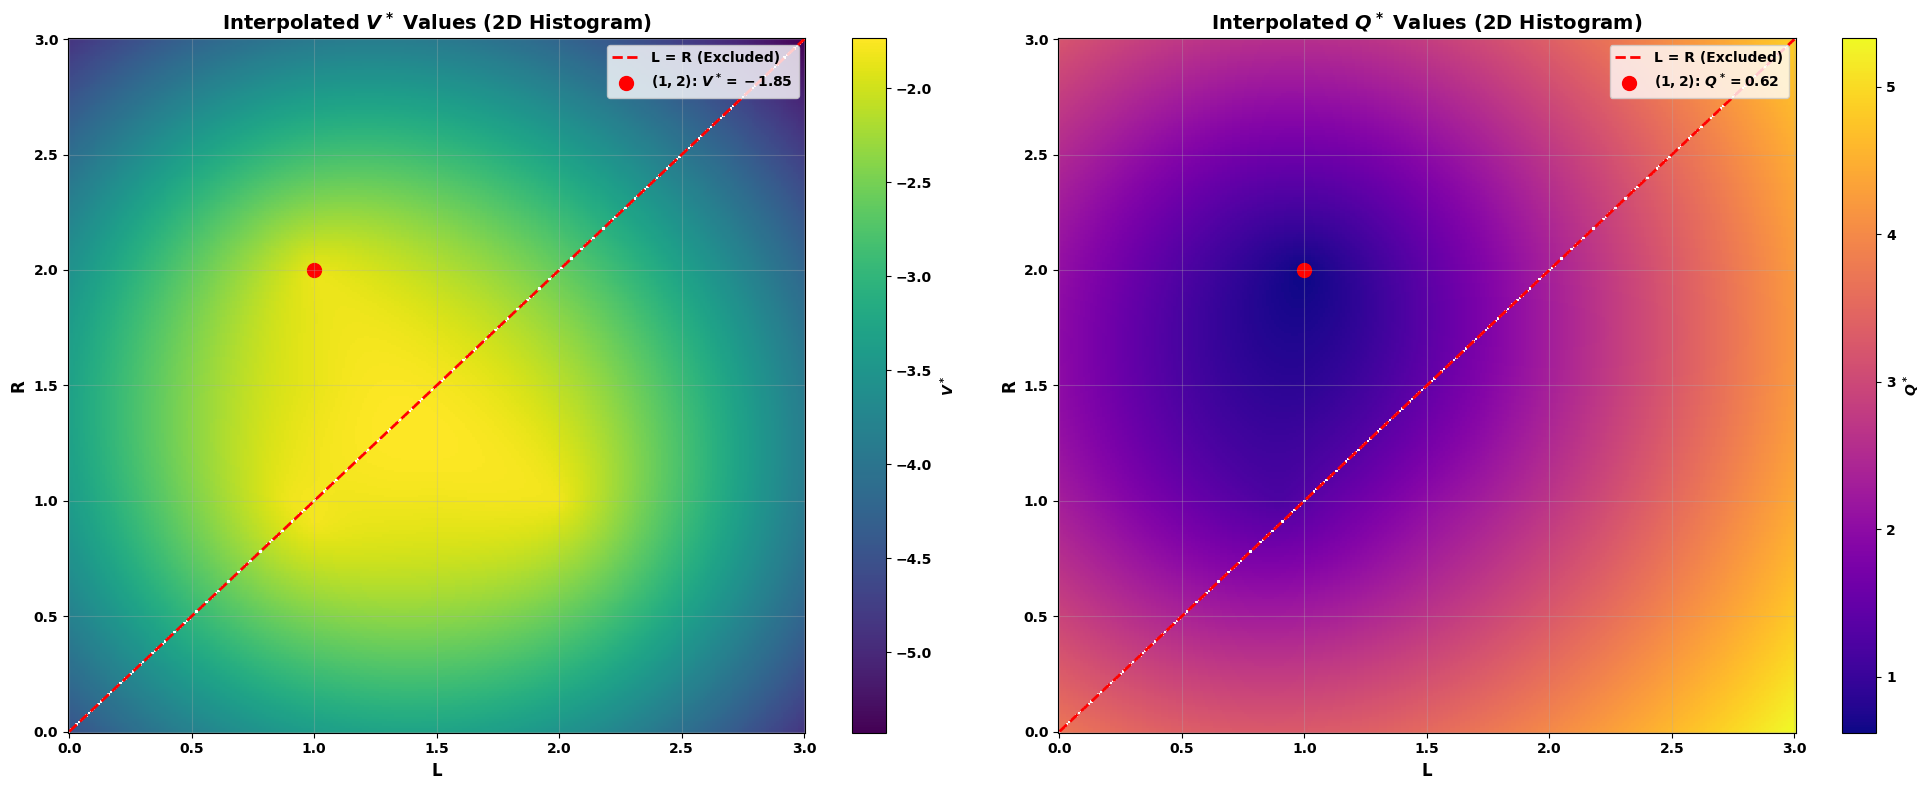

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Given data points
L = np.array([1, 1, 1, 1, 1, 0.9, 1.1, 1.2, 1.5, 2])
R = np.array([0.9, 1.1, 1.5, 1.8, 2, 1, 1, 1, 1, 1])
V_star = np.array([-1.80, -1.81, -1.87, -1.87, -1.85, -1.82, -1.82, -1.82, -1.82, -1.82])
Q_star = np.array([1.50, 1.21, 0.87, 0.71, 0.62, 1.21, 1.48, 1.61, 2.01, 2.68])

# Define grid resolution
grid_resolution = 0.01

# Generate grid for L and R in [0, 3] excluding L = R
L_grid = np.arange(0, 3.0 + grid_resolution, grid_resolution)
R_grid = np.arange(0, 3.0 + grid_resolution, grid_resolution)
L_mesh, R_mesh = np.meshgrid(L_grid, R_grid)

# Mask for L = R (exclude these points)
mask = L_mesh != R_mesh

# Interpolate V* and Q* using Radial Basis Function (Rbf)
rbf_V = Rbf(L, R, V_star, function='linear')
rbf_Q = Rbf(L, R, Q_star, function='linear')

# Evaluate interpolated functions on the grid
V_star_interp = rbf_V(L_mesh, R_mesh)
Q_star_interp = rbf_Q(L_mesh, R_mesh)

# Apply mask to exclude L = R
V_star_interp[~mask] = np.nan
Q_star_interp[~mask] = np.nan

# Highlight specific point (L, R) = (1, 2)
highlight_L, highlight_R = 1, 2
highlight_V, highlight_Q = -1.85, 0.62

# Plot settings
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Figure 1: V* heatmap
im1 = ax1.pcolormesh(L_mesh, R_mesh, V_star_interp, cmap='viridis', shading='auto')
ax1.plot([0, 3], [0, 3], color='red', linestyle='--', linewidth=2, label='L = R (Excluded)')
ax1.scatter(highlight_L, highlight_R, color='red', s=100, label=f'$(1, 2)$: $V^*={highlight_V}$')
ax1.set_xlabel('L', fontsize=12, fontweight='bold')
ax1.set_ylabel('R', fontsize=12, fontweight='bold')
ax1.set_title('Interpolated $V^*$ Values (2D Histogram)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
fig.colorbar(im1, ax=ax1, label='$V^*$', orientation='vertical')

# Figure 2: Q* heatmap
im2 = ax2.pcolormesh(L_mesh, R_mesh, Q_star_interp, cmap='plasma', shading='auto')
ax2.plot([0, 3], [0, 3], color='red', linestyle='--', linewidth=2, label='L = R (Excluded)')
ax2.scatter(highlight_L, highlight_R, color='red', s=100, label=f'$(1, 2)$: $Q^*={highlight_Q}$')
ax2.set_xlabel('L', fontsize=12, fontweight='bold')
ax2.set_ylabel('R', fontsize=12, fontweight='bold')
ax2.set_title('Interpolated $Q^*$ Values (2D Histogram)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
fig.colorbar(im2, ax=ax2, label='$Q^*$', orientation='vertical')

# Adjust layout and display
plt.tight_layout()
plt.show()